<a href="https://colab.research.google.com/github/shwetajain1022/Project-4/blob/main/AUS_solar_model_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [76]:
# Read in data
df = pd.read_csv("model_data/energyconsumptiongdppopulation.csv")
print(df.head())

  country_code    country  distribution_losses_electricity  \
0          ARG  Argentina                              0.0   
1          ARG  Argentina                              0.0   
2          ARG  Argentina                              0.0   
3          ARG  Argentina                              0.0   
4          ARG  Argentina                              0.0   

   coal_peat_and_manufactured_gases  combustible_renewables  geothermal  \
0                          254.9680                103.7220         0.0   
1                           59.6120                 23.6500         0.0   
2                          276.3790                 57.9470         0.0   
3                          189.0145                 56.9715         0.0   
4                            0.0000                 97.5631         0.0   

       hydro  natural_gas   nuclear  oil_and_petroleum_products  ...  \
0  1890.1710    6962.6050  356.1880                   1383.5360  ...   
1  2367.2000    6072.3430  717.6

In [80]:
# Aggregate all electricity by production type, then sum and group by date
df_v1 = df.groupby('date').agg({'coal_peat_and_manufactured_gases':'sum','combustible_renewables':sum,'geothermal':sum,'hydro':sum,'natural_gas':sum,'nuclear':sum,'oil_and_petroleum_products':sum,'other_combustible_non-renewables':sum,'other_renewables':sum,'others':sum,
'solar':sum,'wind':sum})

# Show df head
df_v1.head()

,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,other_combustible_non-renewables,other_renewables,others,solar,wind
date,,,,,,,,,,,,
2010-01-01,311991.164,18202.809,3356.901,131035.611,199809.049,187969.079,26682.251,3062.916,41.050,2534.667,1076.094,21616.800
2010-02-01,276402.078,16717.469,2984.355,117189.949,178434.190,169149.658,21968.697,2788.009,41.372,2526.851,1378.970,21277.026
2010-03-01,265732.194,17658.293,3391.531,123161.868,180740.597,173323.512,21673.599,2950.859,41.910,2549.743,2348.388,27260.655
2010-04-01,229405.724,16490.062,3273.102,111134.545,171501.706,156336.231,17388.367,3249.224,41.774,2616.798,2892.520,22196.188
2010-05-01,247530.292,16434.778,3397.020,123029.340,177826.510,160783.441,18428.244,3229.259,42.060,2626.238,2926.375,21266.345


In [84]:
# Create new column of aggregated values
df_v1["nonrenewable_production"] = df_v1["coal_peat_and_manufactured_gases"]+df_v1["nuclear"]+df_v1["oil_and_petroleum_products"]\
+df_v1["other_combustible_non-renewables"]+df_v1["natural_gas"]

# Sort values by date
df_v1.sort_values('date')

# Reset index and show head
df_v1 = df_v1.reset_index()
df_v1.head()

,date,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,other_combustible_non-renewables,other_renewables,others,solar,wind,nonrenewable_production
0,2010-01-01,311991.164,18202.809,3356.901,131035.611,199809.049,187969.079,26682.251,3062.916,41.050,2534.667,1076.094,21616.800,729514.459
1,2010-02-01,276402.078,16717.469,2984.355,117189.949,178434.190,169149.658,21968.697,2788.009,41.372,2526.851,1378.970,21277.026,648742.632
2,2010-03-01,265732.194,17658.293,3391.531,123161.868,180740.597,173323.512,21673.599,2950.859,41.910,2549.743,2348.388,27260.655,644420.761
3,2010-04-01,229405.724,16490.062,3273.102,111134.545,171501.706,156336.231,17388.367,3249.224,41.774,2616.798,2892.520,22196.188,577881.252
4,2010-05-01,247530.292,16434.778,3397.020,123029.340,177826.510,160783.441,18428.244,3229.259,42.060,2626.238,2926.375,21266.345,607797.746


In [85]:
# Get date range of data
print(f'Latest date: {df_v1.date.max()}')
print(f'Latest date: {df_v1.date.min()}')

Latest date: 2021-12-01
Latest date: 2010-01-01


In [86]:
# Convert date to datetime datatype
df_v1['date'] = df_v1['date'].astype('datetime64[ns]')

# Check datatypes
df_v1.dtypes

date                                datetime64[ns]
coal_peat_and_manufactured_gases           float64
combustible_renewables                     float64
geothermal                                 float64
hydro                                      float64
natural_gas                                float64
nuclear                                    float64
oil_and_petroleum_products                 float64
other_combustible_non-renewables           float64
other_renewables                           float64
others                                     float64
solar                                      float64
wind                                       float64
nonrenewable_production                    float64
dtype: object

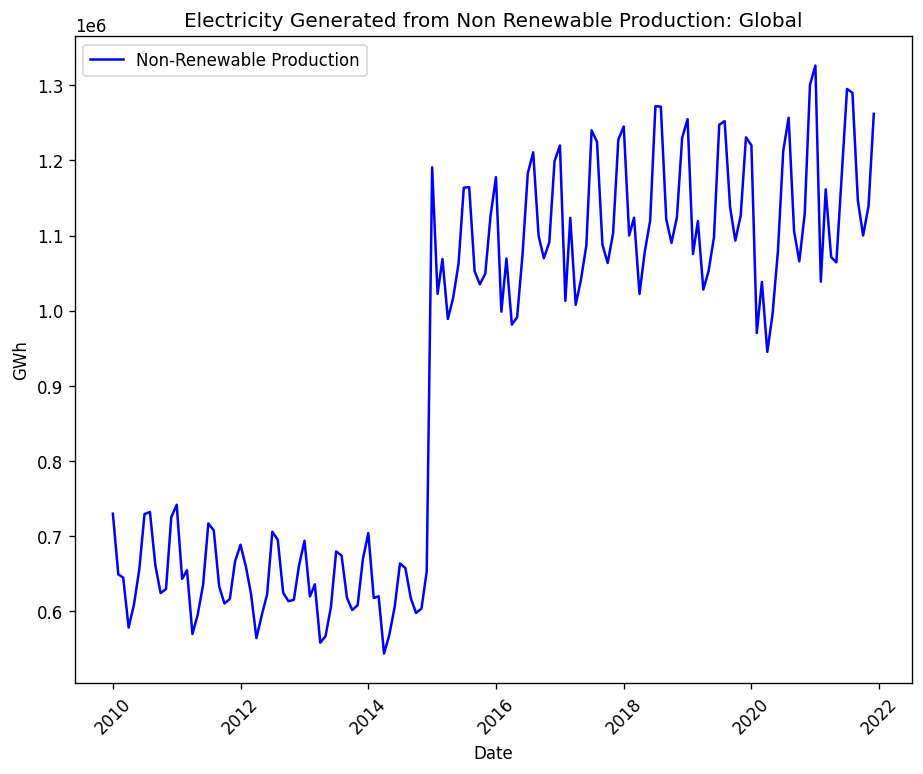

In [87]:
# Visualise data
plt.plot(df_v1['date'],df_v1['nonrenewable_production'], color = "blue", label= "Non-Renewable Production")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production: Global")
plt.legend()
plt.show()

NOTE:
Given the step-change in Non-Renewable Production (GWh) between 2014 and 2015, we will train the model only on from 2015 and onwards.

Note about the dataset:
The electricity production from a number of significant producers (such as China and India) did not report data prior to 2015.

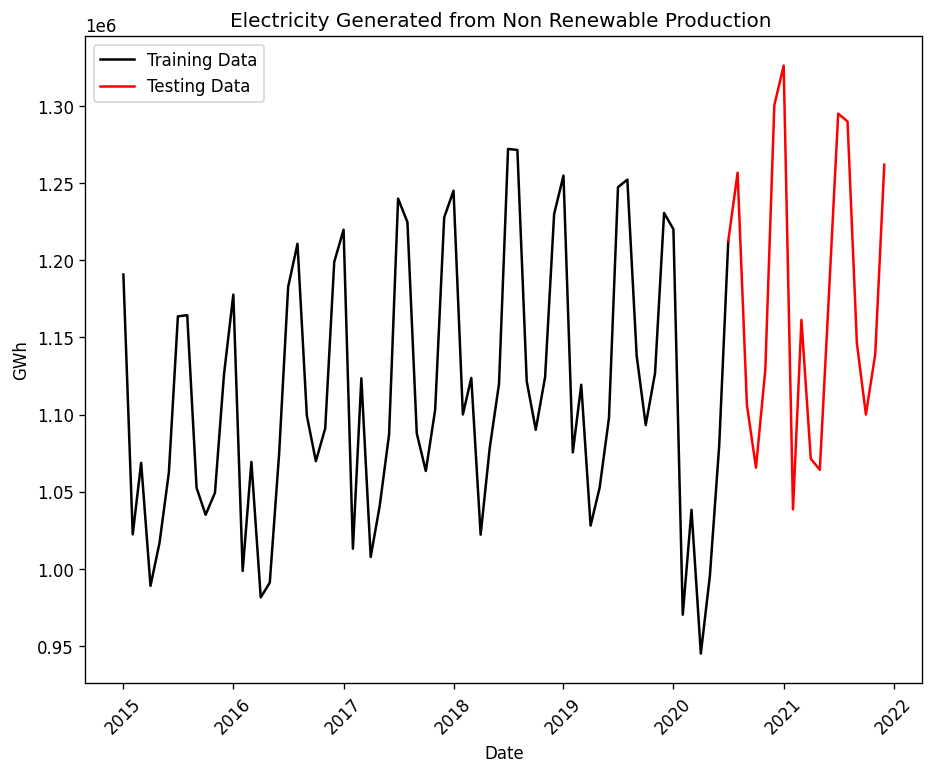

In [88]:
# Set date parameters for train and test data (from 2015 onwards)
train = df_v1[(df_v1["date"] < pd.to_datetime("2020-08-01", format='%Y-%m-%d')) & (df_v1["date"] >= pd.to_datetime("2015-01-01", format='%Y-%m-%d'))]
test = df_v1[df_v1["date"] >= pd.to_datetime("2020-07-01", format='%Y-%m-%d')]

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production ")
plt.legend()
plt.show()

In [89]:
# Import model dependencies
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [90]:
# Set y value to training data
y = train['nonrenewable_production']

In [92]:
# Check data for stationarity using Dickey-Fuller test
# For stationarity to be present, p-value < 0.05

# Import dependencies
from statsmodels.tsa.stattools import adfuller

# Apply test to data
result = adfuller(y)

# Print results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.770053
p-value: 0.395428
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596


NOTE:

* Given p-value > 0.05, data is not stationary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


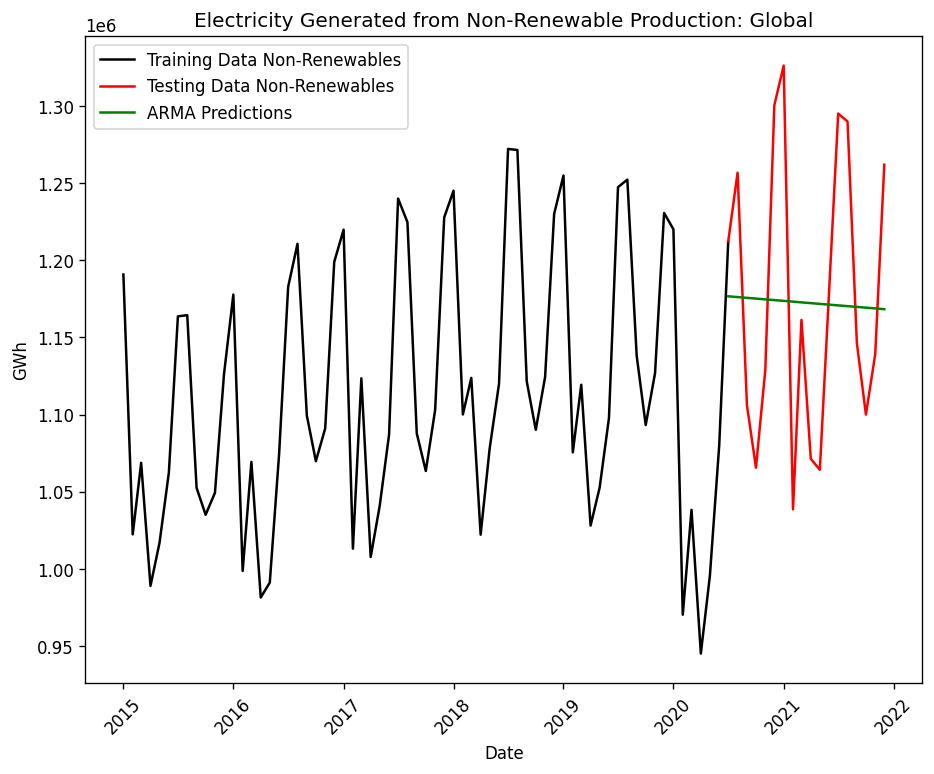

ARMA RMSE:  91578.71146572605


In [94]:
# TEST ARMA:
# Set initial inputs and parameters for ARMA model (don't assume stationarity)
ARMAmodel = SARIMAX(y, order = (1, 0, 1), enforce_stationarity=False)

# Fit model
ARMAmodel = ARMAmodel.fit()

# Set other inputs and parameters for model
y_pred = ARMAmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arma = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data Non-Renewables")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data Non-Renewables")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non-Renewable Production: Global")
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arma_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

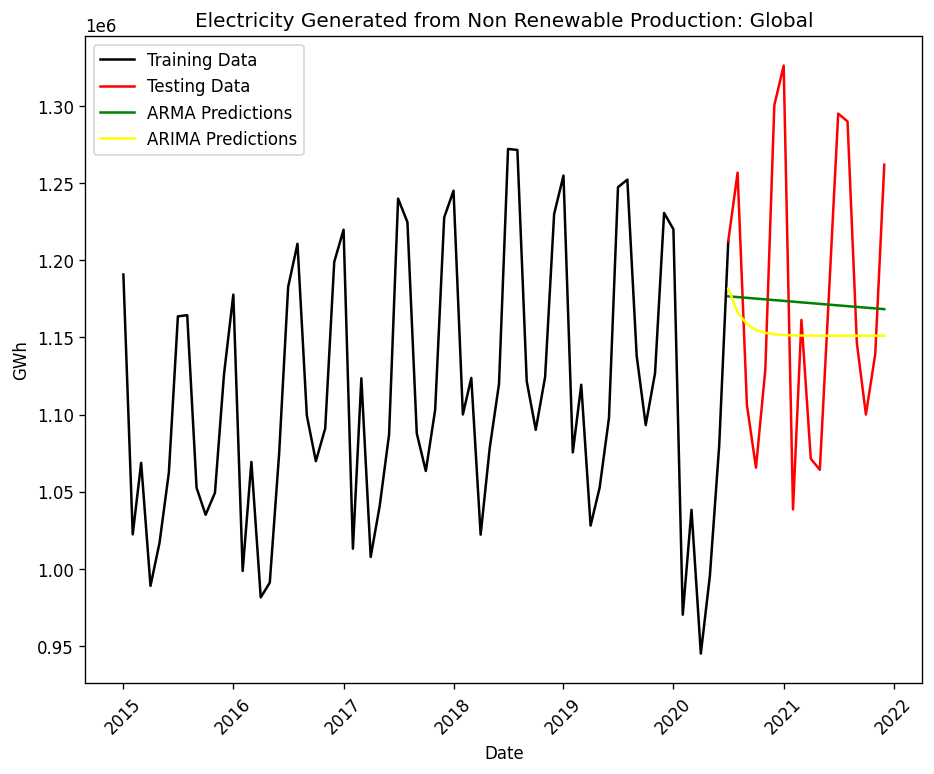

ARIMA RMSE:  93053.70943527643


In [95]:
# TEST ARIMA
# Set initial inputs and parameters for ARIMA model
ARIMAmodel = ARIMA(y, order = (1, 1, 1))

# Fit model
ARIMAmodel = ARIMAmodel.fit()

# Set other inputs and parameters for model
y_pred = ARIMAmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arima = y_pred_df["Predictions"]

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production: Global")
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arima_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arima_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: Valu

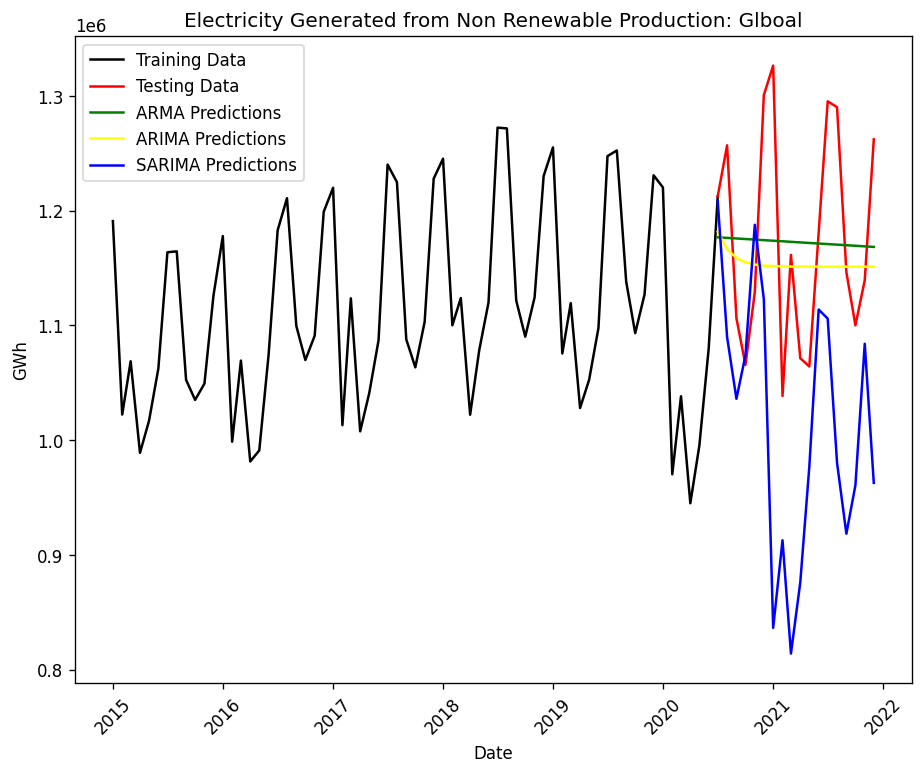

SARIMA RMSE:  209550.33098223034


In [97]:
# TEST SARIMA
# Set initial inputs and parameters for SARIMA model
SARIMAXmodel = SARIMAX(y, order = (1 , 1, 1), seasonal_order=(2,2,2,12))

# Fit model
SARIMAXmodel = SARIMAXmodel.fit()

# Set other inputs and parameters for model
y_pred = SARIMAXmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_sarima = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production: Glboal")
plt.plot(y_pred_out_arma, color='Green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
sarima_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

In [124]:
# Create list of RMSE results
RMSE_results = [arma_rmse, arima_rmse, sarima_rmse]

# print("ARMA RMSE: ",arma_rmse)
print(f'Minumum RMSE result = {min(RMSE_results)}')

Minumum RMSE result = 91578.71146572605


NOTE:

*   Given ARMA model produced lowest RMSE of all three tests, we will seek to optimise ARMA model.
*   For ARMA model, d is always equal to 0

In [125]:
# GIVEN ARMA MODEL IS BEING USED FOR OPTIMISATION, NO OPTIMISATION FOR "D" IS REQUIRED
# FOR ARMA MODEL, D WILL = 0

# -------------------------------------------------------

# Create empty dictionary to store test outputs
optimal_d = {}

# Testing for optimal "d"
for d in range(0,7):
  # Set initial inputs and parameters for ARMA model
  ARMAmodel_d = SARIMAX(y, order = (1, d, 1), enforce_stationarity=False)

  # Fit model
  ARMAmodel_d = ARMAmodel_d.fit()

  # Set other inputs and parameters for model
  y_pred = ARMAmodel_d.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05) 
  y_pred_df["Predictions"] = ARMAmodel_d.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_arma_d = y_pred_df["Predictions"] 

  # Compute RMSE and print result
  arma_d_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))

  # Add RMSE output to dictionary
  optimal_d[d] = arma_d_rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided a

In [126]:
# Print results from "d" optimisation
print(f'Results for "d" optimisation: {optimal_d}')

# Set "d" value that minimises RMSE
d = min(optimal_d, key=optimal_d.get)

# Print "p" value that minimises RMSE
print(f'd = {min(optimal_d, key=optimal_d.get)} is optimal value')

Results for "d" optimisation: {0: 91578.71146572605, 1: 115279.76114150626, 2: 716367.7339641127, 3: 3679448.172897837, 4: 7282235.937980255, 5: 30998274.730769392, 6: 410168717.33921236}
d = 0 is optimal value


NOTE:

*   Given ARMA model is being used, optimal value for "d" will always be 0. In reality, no optimisation is required.

In [115]:
# Create empty dictionary to store test results
optimal_p = {}

# Testing for optimal "p"
for p in range(0,10):
  # Set initial inputs and parameters for ARMA model
  ARMAmodel_p = SARIMAX(y, order = (p, d, 1), enforce_stationarity=False)

  # Fit model
  ARMAmodel_p = ARMAmodel_p.fit()

  # Set other inputs and parameters for model
  y_pred = ARMAmodel_p.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05) 
  y_pred_df["Predictions"] = ARMAmodel_p.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_arma_p = y_pred_df["Predictions"] 

  # Compute RMSE and add to dictionary
  arma_p_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))

  optimal_p[p] = arma_p_rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided a

In [116]:
# Print results from "p" optimisation
print(f'Results for "p" optimisation: {optimal_p}')

# Set "p" value that minimises RMSE
p = min(optimal_p, key=optimal_p.get)

# Print "p" value that minimises RMSE
print(f'p = {min(optimal_p, key=optimal_p.get)} is optimal value')

Results for "p" optimisation: {0: 1147596.5938938127, 1: 91578.71146572605, 2: 99070.92645185615, 3: 93786.74453220367, 4: 87669.33986689754, 5: 124418.47518014343, 6: 132855.56171671255, 7: 133686.47388462638, 8: 140309.49474100632, 9: 139492.89013354073}
p = 4 is optimal value


In [118]:
# Create empty dictionary to store test results
optimal_q = {}

# Testing for optimal "q"
for q in range(0,10):
  # Set initial inputs and parameters for ARMA model
  ARMAmodel_q = SARIMAX(y, order = (p, d, q), enforce_stationarity=False)

  # Fit model
  ARMAmodel_q = ARMAmodel_q.fit()

  # Set other inputs and parameters for model
  y_pred = ARMAmodel_q.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05) 
  y_pred_df["Predictions"] = ARMAmodel_q.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_arma_q = y_pred_df["Predictions"] 

  # Compute RMSE and print result
  arma_q_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))

  optimal_q[q] = arma_q_rmse

print(optimal_q)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided a

{0: 115439.5294671943, 1: 87669.33986689754, 2: 117563.77075817146, 3: 90907.73112741504, 4: 120433.64268464565, 5: 128100.19680266906, 6: 90112.98636761328, 7: 134176.04562168763, 8: 115152.30329813709, 9: 101591.0029600213}


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [119]:
# Print results from "q" optimisation
print(f'Results for "q" optimisation: {optimal_q}')

# Set "q" value that minimises RMSE
q = min(optimal_q, key=optimal_q.get)

# Print "q" value that minimises RMSE
print(f'q = {min(optimal_q, key=optimal_q.get)} is optimal value')

Results for "q" optimisation: {0: 115439.5294671943, 1: 87669.33986689754, 2: 117563.77075817146, 3: 90907.73112741504, 4: 120433.64268464565, 5: 128100.19680266906, 6: 90112.98636761328, 7: 134176.04562168763, 8: 115152.30329813709, 9: 101591.0029600213}
q = 1 is optimal value


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction res

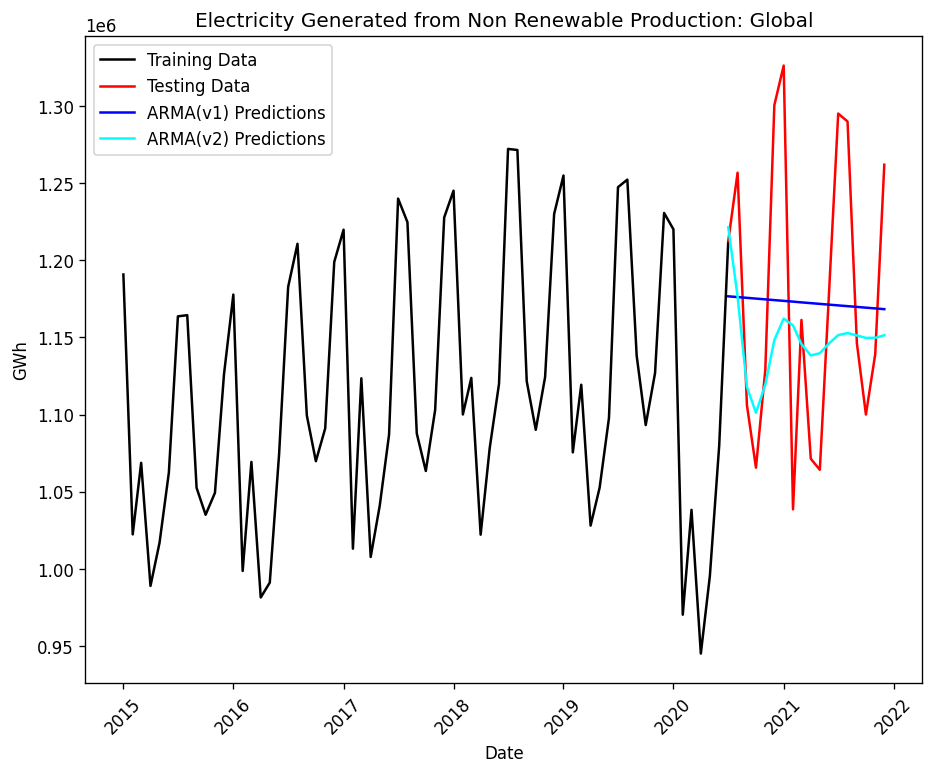

ARMA_v1 RMSE:  91578.71146572605
ARMA_v2 RMSE:  87669.33986689754


In [120]:
# Set initial inputs and parameters for SARIMA model V2
ARMAmodel_v2 = SARIMAX(y, order = (p, d, q), enforce_stationarity=False)

# Fit model
ARMAmodel_v2 = ARMAmodel_v2.fit()

# Set other inputs and parameters for model
y_pred = ARMAmodel_v2.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel_v2.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arma_v2 = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production: Global")
plt.plot(y_pred_out_arma, color='Blue', label = 'ARMA(v1) Predictions')
plt.plot(y_pred_out_arma_v2, color='Cyan', label = 'ARMA(v2) Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arma_v2_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))
print("ARMA_v1 RMSE: ",arma_rmse)
print("ARMA_v2 RMSE: ",arma_v2_rmse)

In [121]:
# Use Sarima model to forecast datapoints
ARMAmodel_fcast = SARIMAX(y, order = (p, d, q), enforce_stationarity=False)

# Fit model
ARMAmodel_fcast = ARMAmodel_fcast.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
# Create forecast date range, monthly frequency
index_future_dates=pd.date_range(start='2022-01-01',end='2025-01-01', freq='MS')

# Predict data for forecast date range using SARIMA model
pred=ARMAmodel_fcast.predict(start=len(df_v1),end=len(df_v1)+36,typ='levels').rename('ARMA Predictions')

# Set forecast date range to index
pred.index=index_future_dates

#Print forecast data
print(pred)

2022-01-01    1.199584e+06
2022-02-01    1.200389e+06
2022-03-01    1.201194e+06
2022-04-01    1.201999e+06
2022-05-01    1.202805e+06
2022-06-01    1.203611e+06
2022-07-01    1.204418e+06
2022-08-01    1.205226e+06
2022-09-01    1.206034e+06
2022-10-01    1.206842e+06
2022-11-01    1.207652e+06
2022-12-01    1.208461e+06
2023-01-01    1.209271e+06
2023-02-01    1.210082e+06
2023-03-01    1.210894e+06
2023-04-01    1.211705e+06
2023-05-01    1.212518e+06
2023-06-01    1.213331e+06
2023-07-01    1.214144e+06
2023-08-01    1.214958e+06
2023-09-01    1.215773e+06
2023-10-01    1.216588e+06
2023-11-01    1.217404e+06
2023-12-01    1.218220e+06
2024-01-01    1.219037e+06
2024-02-01    1.219854e+06
2024-03-01    1.220672e+06
2024-04-01    1.221490e+06
2024-05-01    1.222309e+06
2024-06-01    1.223129e+06
2024-07-01    1.223949e+06
2024-08-01    1.224770e+06
2024-09-01    1.225591e+06
2024-10-01    1.226413e+06
2024-11-01    1.227235e+06
2024-12-01    1.228058e+06
2025-01-01    1.228881e+06
F

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


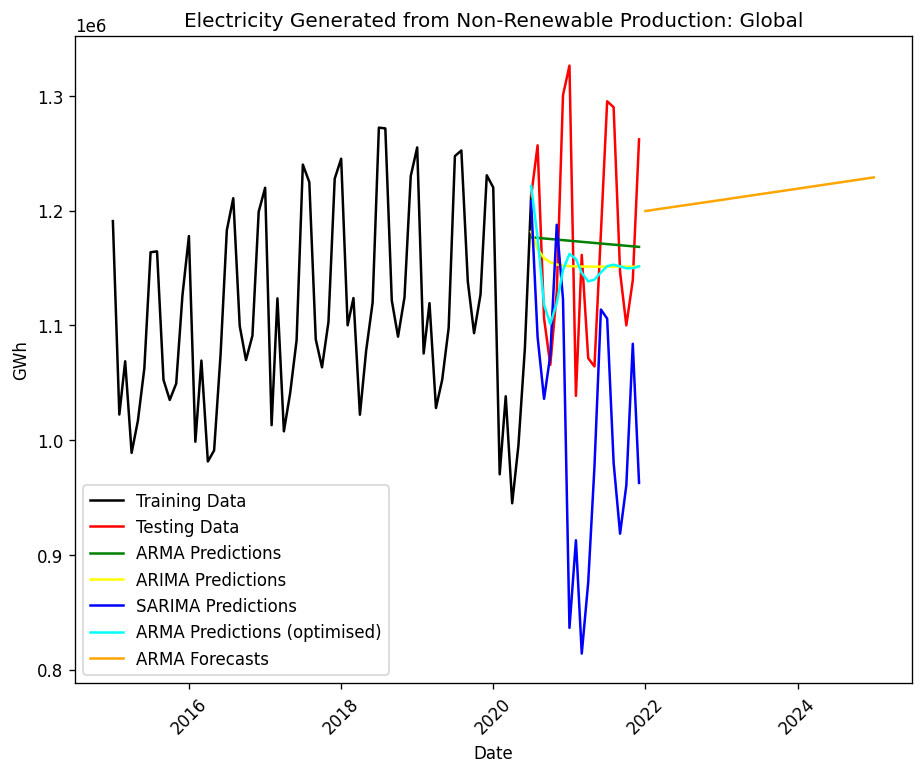

In [123]:
# Plot forecast data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non-Renewable Production: Global")
plt.plot(y_pred_out_arma, color='Green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out_arma_v2, color='Cyan', label = 'ARMA Predictions (optimised)')
plt.plot(pred.index,pred, color='Orange', label= 'ARMA Forecasts')
plt.legend()
plt.show()
